In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import scale
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pickle


#from google.colab import drive
#drive.mount('/content/gdrive')

In [24]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)
df_train

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


Declaration

In [25]:
X_N = df_train[['N']] #.iloc[:100]
X_P = df_train[['P']]
X_K = df_train[['K']]
X_temp = df_train[['temperature']]
X_moist = df_train[['humidity']]
y = df_train[['ph']] #.iloc[:100]


In [26]:
class kMeans():
  def __init__(self):
    return
    
  def input_train(self, X_in, y_in):
    self.X = X_in
    self.y = y_in
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
    self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
    return self.data
  def kmeans_test(self,clust):
    self.km = KMeans(n_clusters = clust)
    self.clusters = self.km.fit_predict(self.data)
    self.clust_data = plt.scatter(*zip(*self.data),c=self.clusters)
    
    self.labels = self.km.labels_
    
    print(self.labels)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(self.data, self.labels))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(self.clusters, self.labels))
    print("Completeness: %0.3f" % metrics.completeness_score(self.clusters, self.labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(self.clusters, self.labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(self.clusters, self.labels))
    print("Adjusted Mutual Information: %0.3f"% metrics.adjusted_mutual_info_score(self.clusters, self.labels))
    
    return self.clust_data
  
  def kmeans_outlier(self,threshold):
    self.centroids = self.km.cluster_centers_
    self.points = np.empty((0,len(self.data[0])), float)
    self.distances = np.empty((0,len(self.data[0])), float)
    for i, center_elem in enumerate(self.centroids):
      self.distances = np.append(self.distances, cdist([center_elem],self.data[self.clusters == i], 'euclidean')) 
      self.points = np.append(self.points, self.data[self.clusters == i], axis=0)
      
    percentile = threshold
    self.outliers = self.points[np.where(self.distances > np.percentile(self.distances, percentile))]
    outliers_df = pd.DataFrame(self.outliers,columns =['X','y'])
    return outliers_df

  def kmeans_results(self):
    fig = plt.figure()
    plt.scatter(*zip(*self.data),c=self.clusters)
    plt.scatter(*zip(*self.outliers),marker="o",facecolor="None",edgecolor="g",s=70); 
    plt.scatter(*zip(*self.centroids),marker="o",facecolor="b",edgecolor="b",s=20);

kmeanstest = kMeans()


Nitrogen and pH

In [27]:
kmeanstest.input_train(X_N,y)

array([[21.        ,  5.69958697],
       [29.        ,  6.96741777],
       [60.        ,  5.72257982],
       ...,
       [11.        ,  6.47544932],
       [11.        ,  6.36114111],
       [32.        ,  7.00703752]])

[0 0 2 ... 0 0 0]
Silhouette Coefficient: 0.623
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


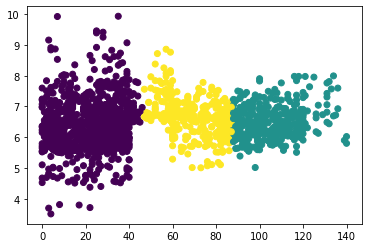

In [28]:
kmeanstest.kmeans_test(3)

In [29]:
kmeanstest.kmeans_outlier(80)

,X,y
0,39.0,5.004075
1,40.0,4.697751
2,43.0,7.806748
3,6.0,5.733540
4,1.0,6.819827
...,...,...
303,52.0,8.380185
304,50.0,6.540821
305,87.0,6.759212
306,47.0,6.661871


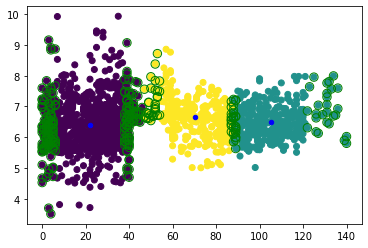

In [30]:
kmeanstest.kmeans_results()

Phosphorous and pH

In [31]:
kmeanstest.input_train(X_P,y)

array([[ 26.        ,   5.69958697],
       [ 35.        ,   6.96741777],
       [ 44.        ,   5.72257982],
       ...,
       [ 36.        ,   6.47544932],
       [124.        ,   6.36114111],
       [ 78.        ,   7.00703752]])

[0 0 2 ... 0 1 2]
Silhouette Coefficient: 0.640
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


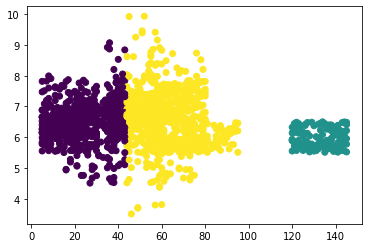

In [32]:
kmeanstest.kmeans_test(3)

In [33]:
kmeanstest.kmeans_outlier(80)

,X,y
0,9.0,5.956402
1,6.0,6.095261
2,8.0,5.562912
3,5.0,6.649087
4,40.0,6.271479
...,...,...
303,78.0,5.915569
304,86.0,5.644487
305,78.0,5.982855
306,94.0,6.387431


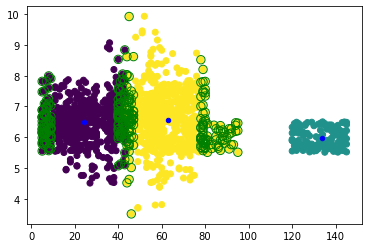

In [34]:
kmeanstest.kmeans_results()

Potassium and ph

In [35]:
kmeanstest.input_train(X_K,y)

array([[ 27.        ,   5.69958697],
       [ 28.        ,   6.96741777],
       [ 23.        ,   5.72257982],
       ...,
       [ 31.        ,   6.47544932],
       [204.        ,   6.36114111],
       [ 22.        ,   7.00703752]])

[1 1 1 ... 1 0 1]
Silhouette Coefficient: 0.678
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


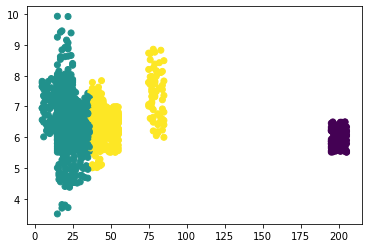

In [36]:
kmeanstest.kmeans_test(3)

In [37]:
kmeanstest.kmeans_outlier(80)

,X,y
0,35.0,6.485761
1,6.0,7.335158
2,6.0,6.819827
3,33.0,6.095261
4,34.0,5.074273
...,...,...
303,77.0,7.485996
304,84.0,6.920251
305,39.0,7.165697
306,79.0,8.766129


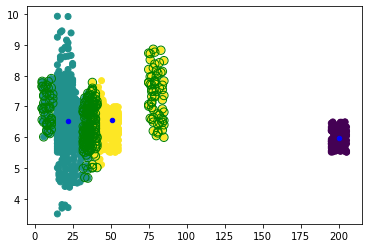

In [38]:
kmeanstest.kmeans_results()

Temperature and ph

In [39]:
kmeanstest.input_train(X_temp,y)

array([[27.00315545,  5.69958697],
       [28.3471611 ,  6.96741777],
       [24.7947077 ,  5.72257982],
       ...,
       [27.92063282,  6.47544932],
       [13.42988625,  6.36114111],
       [23.97081395,  7.00703752]])

[2 2 2 ... 2 1 2]
Silhouette Coefficient: 0.480
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


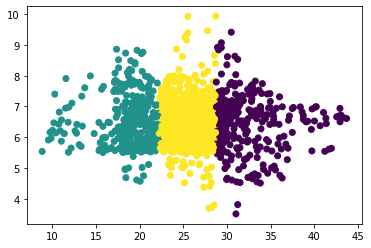

In [40]:
kmeanstest.kmeans_test(3)

In [41]:
kmeanstest.kmeans_outlier(80)

,X,y
0,35.093574,5.004075
1,28.954512,6.421271
2,28.836010,6.890760
3,29.095883,6.159051
4,29.162266,5.816622
...,...,...
303,28.546224,7.368319
304,22.443077,6.160267
305,22.750888,5.521467
306,22.802131,7.046607


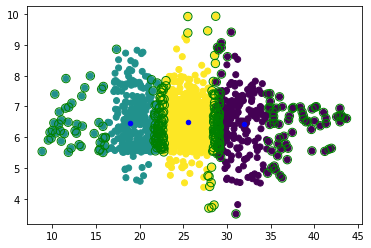

In [42]:
kmeanstest.kmeans_results()

Moisture and pH

In [43]:
kmeanstest.input_train(X_moist,y)

array([[47.67525434,  5.69958697],
       [53.53903102,  6.96741777],
       [70.04556743,  5.72257982],
       ...,
       [51.77965917,  6.47544932],
       [80.06633966,  6.36114111],
       [62.35557553,  7.00703752]])

[2 2 2 ... 2 1 2]
Silhouette Coefficient: 0.700
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


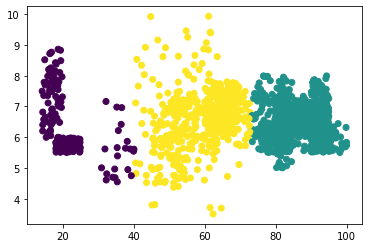

In [44]:
kmeanstest.kmeans_test(3)

In [45]:
kmeanstest.kmeans_outlier(80)

,X,y
0,30.986855,5.004075
1,34.137371,4.697751
2,36.678471,6.962386
3,32.315289,4.608695
4,35.429100,4.548202
...,...,...
303,69.027623,5.773455
304,50.960405,6.107296
305,45.413936,5.956585
306,71.516474,5.721667


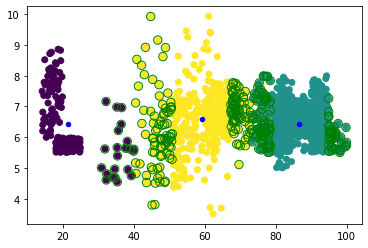

In [46]:
kmeanstest.kmeans_results()